# 3 Layer Neural Network (with relu nonlinearity) Using Numpy

# Implementation Details and Discussion

* Here, I have generated the 3d input and 2d output data first.
* Then I have built a 3 layer neural network from scrach with ReLU non linearity
* Here the output has 2 neurons

## Steps: 
I have listed down the the formula and steps I have followed in each section:
- Initialized the parameters for a three-layer network 
- Implemented the forward propagation module 
     - Used ACTIVATION function ReLU
     - Combined the previous steps into a new [LINEAR->ACTIVATION] forward function.
- Computed the MSE loss.
- Implemented the backward propagation module
    - Complete the linear part of a layer's backward propagation step.
    - Used the gradient of the ACTIVATE function relu_backward
    - Combine the previous steps into a new [LINEAR->ACTIVATION] backward function.
- Finally updated the parameters.

## Equation of Multi Layer:
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} $$

$$ A^{[l]} = g^{[l]}(Z^{[l]}) $$

Where $l$ is the `lth` layer.

## ExtraCredit:
* At the bottom I have plotted the data in 3d space. 
* To plot 3 dimensional data, I have reduced x into 2-d using TSNE

# Check if GPU/TPU available

In [ ]:
!nvidia-smi

Wed Mar 17 08:49:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Colab environment

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


# Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Data: 3D Input :: 2D Output

In [ ]:
# Make non-linear data, using 3 dimensional input data and 2 output neurons

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1, 4],[2, 1, 2]]).T
bias_true = np.array([0.5, 0.25])

# f(x) =  y = 5x + b
# f(x) = y = x^2w + b 

# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_true, label='underlying function')
  if y_true is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_true, label='our function')
  plt.legend()

#plot_3d(x, y_true, y_pred)

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


In [ ]:
# Generating data of 3 dim input and 2 dim output
n, d = 500, 3
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5,1,5],[1,2,1]]).T
bias_true = np.array([1,2])
y_true = (x**2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (500, 3), weights: (3, 2), bias: (2,), y: (500, 2)


# Building Multi Layer NN: 3 Layer


## Loss Function (MSE)

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

## Building Linear Layer


In [ ]:
class Linear:
  #Randomly initialize weight and bias
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  #backpass
  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  #update params
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

## Activation Function: Non Linear 

### ReLU

In [ ]:
class Relu:
    def __call__(self, input_):
      self.input_ = input_
      self.output = np.clip(self.input_, 0, None)
      return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

### Sigmoid

In [ ]:
#not using it currenty; created for testing
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def relu(x):
    return np.maximum(x, 0)

### Testing

In [ ]:
tmp_x = np.array([-1.2, -2.0, 1.3])

sx = sigmoid(tmp_x)
rx = relu(tmp_x)

print(sx, rx)

[0.23147522 0.11920292 0.78583498] [0.  0.  1.3]


## Model Class Architecture


In [ ]:
from typing import Callable

class Model:

  # Configure model
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden,12) # Pick 12 as number of neurons in hidden layer
    self.relu2 = Relu()
    self.linear3 = Linear(12,2)
  
  # Forward pass
  #for 3 layer nn
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  # Backward pass
  #for 3 layer
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  # Update learnable parameters
  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

# Model Training and Validation 

Epoch 0, loss 31.83618775836451
Epoch 20, loss 1.471412234506764
Epoch 40, loss 0.7697116250820066
Epoch 60, loss 0.44925890488696224
Epoch 80, loss 0.3019992738129867
Epoch 100, loss 0.23220152036890496
Epoch 120, loss 0.19357869038793105
Epoch 140, loss 0.1700350122964568
Epoch 160, loss 0.15522264313921252
Epoch 180, loss 0.14429934212531367
Epoch 200, loss 0.13608425248059683
Epoch 220, loss 0.12966898542813932
Epoch 240, loss 0.12423774981752057
Epoch 260, loss 0.1195220683079163
Epoch 280, loss 0.11515807723511805
Epoch 300, loss 0.11134329847949252
Epoch 320, loss 0.10779335831501337
Epoch 340, loss 0.10451555948345831
Epoch 360, loss 0.10162491369948734
Epoch 380, loss 0.09895903401536706
Epoch 400, loss 0.09651385793275179
Epoch 420, loss 0.09420248646538026
Epoch 440, loss 0.09212969608849886
Epoch 460, loss 0.0902587035513283
Epoch 480, loss 0.08856499033182709
Epoch 500, loss 0.08703008593033383
Epoch 520, loss 0.08562130366114155
Epoch 540, loss 0.08427006491052433
Epoch 5

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


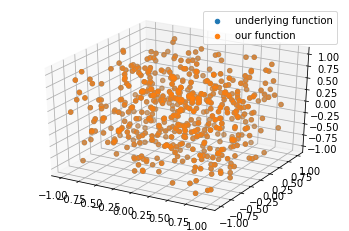

In [ ]:
# Training
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 20 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)
  #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    
loss = MSE()
model = Model(d, 20)
y_pred = model(x)
fit(x, y_true, model=model, loss=loss, lr=0.015, num_epochs=2000)
plot_3d(x, y_true, y_pred)

# Visualization: Training Data and Prediction

## Plot:: Comparison True vs Predicted Value

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


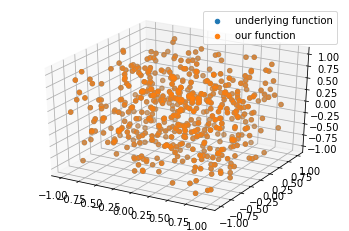

In [ ]:
plot_3d(x, y_true, y_pred)

Text(0.5, 1.0, 'Plot:: Comparison True vs Predicted Value')

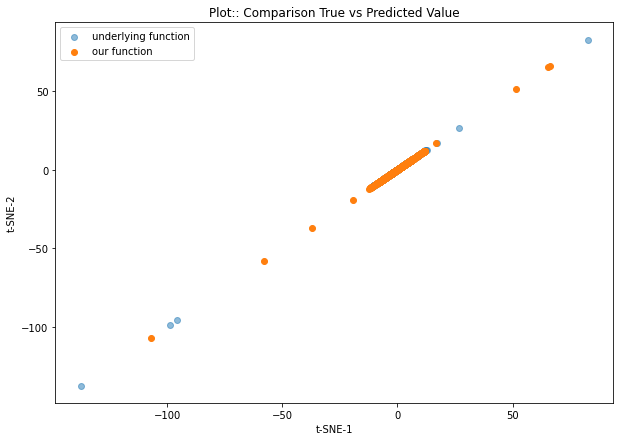

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

view = TSNE(n_components=3, perplexity=10,learning_rate=200,random_state=123).fit_transform(x, y_pred)

def plot_tsne(x, y_true, y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  # plt.plot(x, y_true[:,0], y_true[:,0], color='blue', alpha=0.5, label='True Value')
  plt.legend()

plot_tsne(x, y_true, y_pred)
plt.title("Plot:: Comparison True vs Predicted Value")

In [ ]:
def plot_intereactive_3d(x, y, y_pred=None):
  import plotly.graph_objects as go # Use plotly to create interactive graph

  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x = x[:,0],
                    y = x[:,1],
                    z = y.reshape([-1]),
                    opacity=0.5, mode='markers', name='Underlying Function'
                    ))
 
  if y_pred is not None:
    fig.add_trace(go.Scatter3d(x = x[:,0],
                   y = x[:,1],
                   z = y_pred.reshape([-1]),
                   opacity=0.5, mode='markers', name='Predicted Function'
                  ))
    
  fig.update_layout(scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

## ExtraCredit: t-SNE 3D Plot

In [ ]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2).fit_transform(x)
y_true_reduced = TSNE(n_components=1).fit_transform(y_true)
y_pred_reduced = TSNE(n_components=1).fit_transform(model(x))
print(f'X_reduced: {X_reduced.shape}, y_true_reduced: {y_true_reduced.shape}, y_pred_reduced: {y_pred_reduced.shape}')
plot_intereactive_3d(X_reduced,y_true_reduced,y_pred_reduced)

X_reduced: (500, 2), y_true_reduced: (500, 1), y_pred_reduced: (500, 1)
